In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.image.resize_with_pad(x_train[...,tf.newaxis],32,32) / 255  # ... means All values & tf.newaxis means padding in outer boundary
x_test = tf.image.resize_with_pad(x_test[...,tf.newaxis],32,32) / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
# Build LeNet-5 architecture of Reasearch Paper
model = models.Sequential([
    layers.Conv2D(6,kernel_size=5,activation='sigmoid',input_shape=(32,32,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16,kernel_size=5,activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120,activation='sigmoid'),
    layers.Dense(84,activation='sigmoid'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile and Train
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.1096 - loss: 2.3124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.1082 - loss: 2.3030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1109 - loss: 2.3023
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.1098 - loss: 2.3029
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1096 - loss: 2.3025
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1080 - loss: 2.3025
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1124 - loss: 2.3020
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1131 - loss: 2.3012
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1157 - loss: 2.3005
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1172 - loss: 2.2995


In [9]:
index = 23
image = x_test[index:index+1]
pred = model.predict(image)
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1


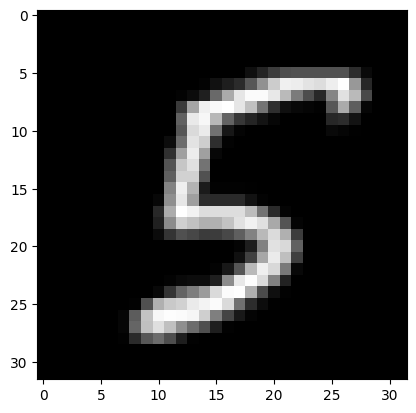

In [10]:
plt.imshow(x_test[index].numpy().squeeze(),cmap='gray')

In [13]:
# Build modify LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6,kernel_size=5,activation='relu',input_shape=(32,32,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16,kernel_size=5,activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(84,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [14]:
# Compile and Train
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8879 - loss: 0.3787
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.9819 - loss: 0.0586
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9864 - loss: 0.0427
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9895 - loss: 0.0320
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9928 - loss: 0.0236
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9933 - loss: 0.0214
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9949 - loss: 0.0166
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9957 - loss: 0.0124
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9967 - loss: 0.0107


In [19]:
index = 23
image = x_test[index:index+1]
pred = model.predict(image)
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
5


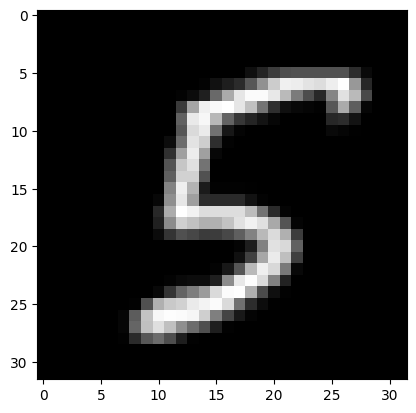

In [20]:
plt.imshow(x_test[index].numpy().squeeze(),cmap='gray')